In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os

In [2]:
df=pd.read_table('FigS15.csv',sep='\t')
df.head()

,Sample,Seedlings,Fe-Leaf,Fe-Root,Mn-Leaf,Mn-Root
0,Col-0,15,91.15,211.11,105.11,125.64
1,Col-0,15,81.27,179.91,108.80,139.09
2,Col-0,15,90.78,182.66,98.10,180.18
3,Col-0-irt1,30,82.29,1046.00,67.45,15.00
4,Col-0-irt1,30,60.95,790.30,72.38,14.93


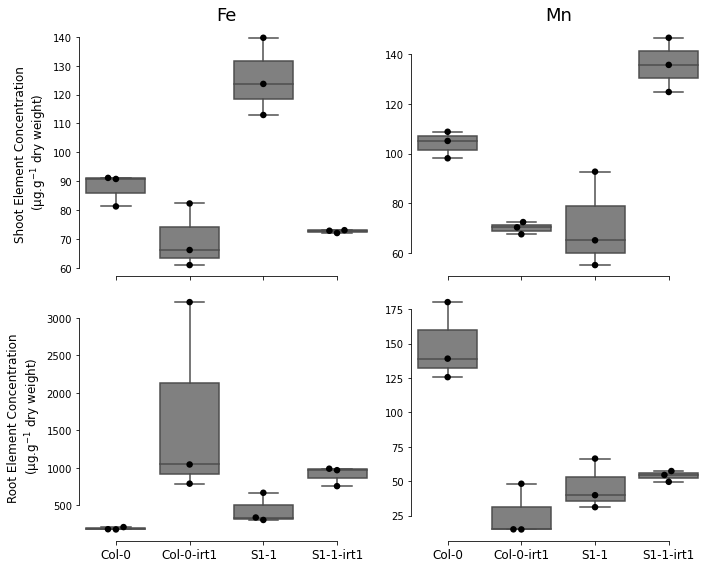

In [3]:
Order=['Col-0','Col-0-irt1','S1-1','S1-1-irt1']
elements=['Fe-Leaf','Mn-Leaf','Fe-Root','Mn-Root']
fig,axes = plt.subplots(2,2,sharey=False,figsize=(10,8))
def leg(idx1,idx2):
    h, l = axes[idx1,idx2].get_legend_handles_labels()
    axes[idx1,idx2].legend(h, l)
    axes[idx1,idx2].legend(h[0:3], l[0:3]) 
    
def plots(element,idx1,idx2):
    sns.boxplot(x='Sample', 
                y=element,
                color='grey',
                data=df,
                order=Order,
                linewidth=1.5,
                ax=axes[idx1,idx2])
    sns.swarmplot(x='Sample',
                 y=element,
                 color="0",
                 data=df,
                 order=Order,
                 linewidth=1.5,
                 ax=axes[idx1,idx2])
    axes[idx1,idx2].set_xlabel('')
    axes[idx1,idx2].set_ylabel('')
a,b=0,0
for index, element in enumerate(elements):
    if index == 0:
        plots(element,0,b)
        axes[0,b].tick_params(labelbottom=False)
        axes[0,b].set_title('Fe',fontsize=18)
        b+=1
    elif index == 1:
        plots(element,0,b)
        axes[0,b].tick_params(labelbottom=False)
        axes[0,b].set_title('Mn',fontsize=18)
        b=0
    elif index > 1:
        plots(element,1,b)        
        b+=1

axes[1,0].tick_params(axis='x', labelsize=12)
axes[1,1].tick_params(axis='x', labelsize=12)   
axes[0,0].set_ylabel('Shoot Element Concentration \n(µg.g$^{-1}$ dry weight)',fontsize=12)
axes[1,0].set_ylabel('Root Element Concentration \n(µg.g$^{-1}$ dry weight)',fontsize=12)

sns.despine(trim=True)
plt.tight_layout()
plt.savefig("FigS15.png", format="png",bbox_inches="tight",facecolor="w",dpi=600)